In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append('../utils')
from strategy_funcs import process_dataframe
from helper_functions import triple_barrier, curado_profits

In [2]:
def ensure_utc(df, col_names):
    """
    Ensure the datetime columns are in UTC.
    """
    if isinstance(col_names, str):  # If a single column is passed as a string convert to list for uniform processing
        col_names = [col_names]     
    
    for col_name in col_names:
        df[col_name] = pd.to_datetime(df[col_name])
        if df[col_name].dt.tz is None:
            df[col_name] = df[col_name].dt.tz_localize('UTC')  # Localize to UTC if no timezone
        else:
            df[col_name] = df[col_name].dt.tz_convert('UTC')  
            

def prepare_data(df, SL=0.025, TP=0.05, tl=48, window_size=28):
    """
    Run labeling method and process dataframe 
    """
    df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)
    
    data_labeled = triple_barrier(df, SL=SL, TP=TP, tl=tl).reset_index(drop=True)
    data_labeled['profit_curado'] = curado_profits(data_labeled)
    data_labeled = data_labeled.drop(columns=['open', 'high', 'low', 'close', 'volume', 'label'])
    
    data_processed = process_dataframe(df, lags=window_size, cols=['open', 'high', 'low', 'close', 'volume'])
    data_processed = data_processed.reset_index().rename(columns={'date': 'startDate'})
    
    profits_df = pd.merge(data_processed, data_labeled, on='startDate', how='inner')
    ensure_utc(profits_df, ['startDate', 'endDate'])
    profits_df = profits_df.sort_values(by='endDate', ascending=False)

    return profits_df

In [3]:
path = '/home/matias/freqtrade/user_data/data/binance/'
coins = ['BTC', 'BNB', 'ETH', 'DOGE']
lista_df = []

for coin in coins:
    print(coin)
    dir_coin = path + f'{coin}_USDT-1h.feather'
    df_coin = pd.read_feather(dir_coin)
    df_prep = prepare_data(df_coin).sort_values(by='endDate', ascending=False)
    df_prep['pair'] = coin
    lista_df.append(df_prep)
    #df_prep.to_csv(f'/home/matias/Downloads/resultados_moneda/{coin}.csv', index=False)

df_final = pd.concat(lista_df, axis=0)

BTC


100%|███████████████████████████████████████████| 61309/61309 [00:07<00:00, 7715.79it/s]


In [16]:
df_btc = pd.read_feather('/home/matias/freqtrade/user_data/data/binance/BTC_USDT-1h.feather')
df_btc['date'] = pd.to_datetime(df_btc.date).dt.tz_localize(None)

df_btc.loc[df_btc.date >= pd.to_datetime("2020-02-19 10"), :].head(10)

,date,open,high,low,close,volume
18615,2020-02-19 10:00:00,10112.86,10144.62,10080.00,10126.09,1836.462568
18616,2020-02-19 11:00:00,10125.00,10150.00,10117.66,10148.93,405.969511
18617,2020-02-19 17:00:00,10149.99,10250.00,10133.10,10158.94,4021.115323
18618,2020-02-19 18:00:00,10157.57,10200.00,10131.25,10194.77,2036.271681
18619,2020-02-19 19:00:00,10194.39,10207.69,10136.90,10139.22,1904.849711
18620,2020-02-19 20:00:00,10138.59,10154.64,10045.45,10152.55,3065.347775
18621,2020-02-19 21:00:00,10153.18,10156.48,9350.00,9615.72,13231.257086
18622,2020-02-19 22:00:00,9615.77,9711.08,9500.00,9693.13,6835.307116
18623,2020-02-19 23:00:00,9693.60,9696.50,9572.42,9593.79,3666.945037
18624,2020-02-20 00:00:00,9594.65,9653.90,9575.00,9626.38,3780.297386


In [46]:
df_final.to_csv('/home/matias/freqtrade/dev/local/modelos/datos/btc_curado_28h.csv', index=False)

## KNN

In [3]:
import pandas as pd

df_actualizado = pd.read_csv('/home/matias/freqtrade/backtest_results/dataframe_actualizado.csv')
df_actualizado['date'] = pd.to_datetime(df_actualizado.date)
df_actualizado.sort_values(by='date', ascending=False).head(15)

,date,open,high,low,close,volume,date_1h,open_1h,high_1h,low_1h,close_1h,volume_1h
998,2024-10-17 13:00:00+00:00,67150.0,67338.6,66660.0,66993.9,22475.209,2024-10-17 13:00:00+00:00,67171.42,67354.94,66669.00,67021.99,1702.17377
997,2024-10-17 12:00:00+00:00,66853.5,67173.8,66790.8,67150.0,8693.002,2024-10-17 12:00:00+00:00,66872.44,67184.00,66799.90,67171.42,998.62443
996,2024-10-17 11:00:00+00:00,67188.0,67271.9,66789.3,66853.6,9389.936,2024-10-17 11:00:00+00:00,67214.01,67285.00,66741.09,66872.43,1944.76935
995,2024-10-17 10:00:00+00:00,67174.9,67299.9,66766.0,67187.9,14815.758,2024-10-17 10:00:00+00:00,67191.41,67295.40,66818.96,67214.00,1208.73503
994,2024-10-17 09:00:00+00:00,67430.1,67516.7,67163.1,67174.8,4838.426,2024-10-17 09:00:00+00:00,67450.00,67530.01,67185.16,67191.40,941.84050
993,2024-10-17 08:00:00+00:00,67280.8,67455.0,67156.3,67430.1,5886.790,2024-10-17 08:00:00+00:00,67303.18,67473.49,67200.00,67450.00,745.35931
992,2024-10-17 07:00:00+00:00,67141.4,67305.1,67054.2,67280.8,9085.438,2024-10-17 07:00:00+00:00,67162.87,67317.17,67087.35,67303.18,1114.64608
991,2024-10-17 06:00:00+00:00,67307.7,67480.0,67104.0,67141.4,7493.161,2024-10-17 06:00:00+00:00,67340.81,67504.49,67104.18,67162.87,1233.26564
990,2024-10-17 05:00:00+00:00,67234.5,67447.9,67231.2,67307.7,4209.602,2024-10-17 05:00:00+00:00,67260.01,67470.00,67260.00,67340.82,509.73015
989,2024-10-17 04:00:00+00:00,67570.1,67570.1,67228.0,67234.4,6328.754,2024-10-17 04:00:00+00:00,67601.40,67601.40,67260.00,67260.00,695.26222


In [23]:
df_api = pd.read_csv('/home/matias/Downloads/freqtrade/ft_userdata/app/profits_28h_curados.csv', parse_dates=['startDate', 'endDate'])
df_api = df_api.sort_values(by='endDate', ascending=False)

len(df_api)

3548

In [22]:
#df_api_first = df_api.head(3548)
#df_api_first.to_csv('/home/matias/Downloads/freqtrade/ft_userdata/app/profits_28h_curados.csv', index=False)

In [3]:
from tqdm import tqdm
import pandas as pd
import os
import ta
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve, CalibrationDisplay
from helper_functions import triple_barrier, add_indicators, curado_profits, FaissKNNClassifier

In [4]:
def process_dataframe(dataframe, lags=14, apply_pct_change=True, cols=['open', 'high', 'low', 'close'], normalize=False):
    # Indexa por fecha
    dfClean = dataframe
    try: 
        dfClean = dfClean.set_index('date')
    except:
        pass
    
    if apply_pct_change:
        dfClean = dfClean.loc[:, cols].pct_change().dropna() 
    else:
        dfClean = dfClean.loc[:, cols].dropna()

    # Itera creando DataFrames de ventanas de 14 días
    dfs_to_concat = list()
    
    for i in range(lags, 0, -1):   
        df_shifted = dfClean.shift(i)
        df_shifted.columns = [f"{col}_{lags-i+1}" for col in list(dfClean.columns)]
        dfs_to_concat.append(df_shifted)
    
    # Lo une en un solo DataFrame
    result_df = pd.concat(dfs_to_concat, axis=1).dropna()
    
    if normalize:
        for col in cols:
            # Get all columns related to the original column (e.g., 'open_1', 'open_2', ..., 'open_lags')
            col_names = [col_name for col_name in result_df.columns if col in col_name]
            
            # Select the columns and compute row-wise mean and std
            col_data = result_df[col_names]
            row_means = col_data.mean(axis=1)
            row_stds = col_data.std(axis=1)
            
            # Normalize the data using broadcasting
            result_df[col_names] = (col_data.subtract(row_means, axis=0)).div(row_stds, axis=0)
            
    return result_df


def get_n_closest(data, startDate, n=100):
    previous_data = data[data['endDate'] < startDate]
    res = previous_data.head(n)
    
    drop_cols = ['startDate', 'endDate', 'profits', 'label', 'profit_curado']
    X_train, y_train = res.drop(columns=drop_cols), res['profit_curado']
    
    return np.array(X_train), np.array(y_train), np.array(res.index)

In [5]:
data_btc = pd.read_feather("~/freqtrade/user_data/data/binance/futures/BTC_USDT_USDT-1h-futures.feather")
data_btc['date'] = pd.to_datetime(data_btc['date']).dt.tz_localize(None)

data_labeled_btc = triple_barrier(data_btc, SL=0.025, TP=0.05, tl=48).reset_index(drop=True)

100%|███████████████████████████████████| 24112/24112 [00:03<00:00, 7269.56it/s]


In [6]:
data_labeled_btc.columns

Index(['startDate', 'open', 'high', 'low', 'close', 'volume', 'label',
       'endDate', 'profits'],
      dtype='object')

In [7]:
data_labeled_btc['profit_curado'] = curado_profits(data_labeled_btc)

"""
labels_junio = data_labeled_btc[data_labeled_btc.startDate >= pd.to_datetime("2024-05-15")]
labels = np.array(labels_junio.profit_curado[:2500]).reshape(50, 50)



#labels = np.array(labels_junio.profit_curado[:2500]).reshape(50, 50)

fig, ax = plt.subplots(figsize=(8, 8))  

# red and green cmap
cmap = plt.get_cmap('RdYlGn', 2)
cax = ax.matshow(labels, cmap=cmap)

# Adjust the grid 
ax.set_xticks(np.arange(-.5, labels.shape[0], 1), minor=True)
ax.set_yticks(np.arange(-.5, labels.shape[1], 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()
"""

#data_labeled_btc.profit_curado.value_counts(normalize=True)
data_labeled_btc_cp = data_labeled_btc.copy() 
data_labeled_btc = data_labeled_btc.drop(columns=['open', 'high', 'low', 'close', 'volume'])

In [8]:
window_size = 28
lags_ind = 1

#data_processed_ind = process_dataframe(data_indicators.set_index('startDate').drop(columns=['adi']), lags=lags_ind, cols=['rsi', 'stoch', 'adx', 'macd'], apply_pct_change=False)
data_processed = process_dataframe(data_btc, lags=window_size, cols=['open', 'high', 'low', 'close', 'volume'])
data_processed = data_processed.reset_index().rename(columns={'date': 'startDate'})
#data_processed_ind = data_processed_ind.reset_index()

processed_btc = data_processed.copy().set_index('startDate')
#processed_ind = data_processed_ind.copy().set_index('startDate')

profits_df = pd.merge(data_processed, data_labeled_btc, on='startDate', how='inner').sort_values(by='endDate', ascending=False)
#profits_df_ind = pd.merge(data_processed_ind, data_labeled_btc, on='startDate', how='inner').sort_values(by='endDate', ascending=False)

dates = processed_btc.index
#dates_ind = processed_ind.index

profits_df.head()

,startDate,open_1,high_1,low_1,close_1,volume_1,open_2,high_2,low_2,close_2,...,volume_27,open_28,high_28,low_28,close_28,volume_28,label,endDate,profits,profit_curado
24077,2024-10-01 12:00:00,0.003367,-0.001670,-0.004820,-0.003948,1.998741,-0.003948,-0.004162,-0.007857,-0.012012,...,0.169922,0.000790,0.000643,0.000130,-0.002891,-0.285045,0,2024-10-01 15:00:00,-0.016188,0
24065,2024-10-01 00:00:00,0.002590,0.001697,0.000315,-0.002183,1.110901,-0.002181,-0.001655,-0.000152,0.000873,...,0.310994,-0.003463,-0.002433,-0.009857,-0.002351,3.724015,0,2024-10-01 15:00:00,-0.014161,0
24052,2024-09-30 09:00:00,-0.000976,-0.000787,-0.002650,-0.002349,1.685020,-0.002353,-0.002026,-0.000376,-0.001312,...,-0.365873,0.003367,-0.001670,-0.004820,-0.003948,1.998741,0,2024-10-01 15:00:00,-0.014144,0
24053,2024-09-30 10:00:00,-0.002353,-0.002026,-0.000376,-0.001312,-0.327058,-0.001309,-0.001015,-0.000825,-0.000609,...,1.998741,-0.003948,-0.004162,-0.007857,-0.012012,0.189978,0,2024-10-01 15:00:00,-0.015831,0
24054,2024-09-30 11:00:00,-0.001309,-0.001015,-0.000825,-0.000609,0.072447,-0.000611,0.000702,0.000015,0.001452,...,0.189978,-0.012011,-0.009864,-0.004489,0.001715,0.164004,0,2024-10-01 15:00:00,-0.018506,0


In [9]:
profits_df = profits_df.drop(columns='label')
profits_df.to_csv('datos/test_1.csv', index=False)

In [18]:
df_1 = pd.read_csv('datos/test_1.csv')
df_2 = pd.read_csv('datos/test_2.csv')

df_1.equals(df_2)

True

In [143]:
def build_dataset(coin, window_size=28, normalize=False, pct=True):
    data_coin = pd.read_feather(f"~/freqtrade/user_data/data/binance/{coin}_USDT-1h.feather")
    data_coin['date'] = pd.to_datetime(data_coin['date']).dt.tz_localize(None)

    data_labeled_coin = triple_barrier(data_coin, SL=0.025, TP=0.04, tl=48).reset_index(drop=True)
    data_labeled_coin['profit_curado'] = curado_profits(data_labeled_coin)
    data_labeled_coin = data_labeled_coin.drop(columns=['open', 'high', 'low', 'close', 'volume', 'label'])

    data_processed = process_dataframe(data_coin, lags=window_size, cols=['open', 'high', 'low', 'close', 'volume'], 
                                       apply_pct_change=pct, normalize=normalize)
    data_processed = data_processed.reset_index().rename(columns={'date': 'startDate'})

    profits_df = pd.merge(data_processed, data_labeled_coin, on='startDate', how='inner').sort_values(by='endDate', ascending=False)
    profits_df['coin'] = coin    

    return profits_df

coins = ["BTC", "ETH", "BNB", "ADA", "DOGE", "MATIC", "SOL"]
df_fin = pd.DataFrame()

for coin in coins:
    df_coin = build_dataset(coin, window_size=24)
    df_fin = pd.concat([df_fin, df_coin], axis=0)

100%|███████████████████████████████████| 34456/34456 [00:04<00:00, 8606.50it/s]


In [147]:
df_fin = df_fin.sort_values(by='startDate')
df_fin.to_csv('datos/crypto_24h_curado.csv', index=False)

In [9]:
def process_predictions(dates, profits_df, processed_df, thr=6/7, n_points=2500, k=9):
    res = {'labels': [], 'pred_probas': [], 'neighbors_info': [], 'fp': [], 
           'promedio': [], 'sd': [], 'dist': [], 'fecha': [], 'dist_media_promedio': []}

    for date in tqdm(dates):
        X, y, row_indexes = get_n_closest(profits_df, date, n=n_points)
        current_data = np.array(processed_df.loc[date])
            
        if len(y) == n_points:
            knn_clf = FaissKNNClassifier(n_neighbors=k)
            knn_clf.fit(X, y)
            pred_proba, idx = knn_clf.predict_proba(current_data)

            # Extract date information from k neighbors
            neighbor_idx = row_indexes[idx].flatten() # Recover indexes from original df
            neigh_data = np.array(profits_df.loc[neighbor_idx, :].iloc[:, 1:141])
            
            neighbors_dates = profits_df.loc[neighbor_idx, 'endDate'].sort_values(ascending=False)
            info_dict = {'current_date': date, 
                         'closest_date': neighbors_dates.max(), 
                         'time_diff': date - neighbors_dates.max(),
                         'furthest_date': neighbors_dates.min()}
            
            pred_proba = np.squeeze(pred_proba, axis=0)
            label = profits_df.loc[profits_df.startDate == date, 'label'].iloc[0]
            res['pred_probas'].append(pred_proba)
            res['labels'].append(label)
            
            # Entry-signals
            if pred_proba[1] >= thr: 
                current_mean = np.mean(neigh_data, axis=0)
                current_sd = np.std(neigh_data, axis=0)
                current_dist = np.linalg.norm(current_data - current_mean) # dist(x, mu)
                row_norm = np.linalg.norm(neigh_data - current_mean, axis=1) # dist(ni, mu) para i = 1,...,k
                mean_neigh_dist = np.mean(row_norm)

                res['promedio'].append(current_mean)
                res['sd'].append(current_sd)
                res['dist'].append(current_dist)
                res['dist_media_promedio'].append(mean_neigh_dist)
                res['neighbors_info'].append(info_dict)
                res['fecha'].append(date)
                #if label == 0:
                #    res['fp'].append((date, profits_df.loc[neighbor_idx, 'startDate'].sort_values(ascending=False)))

    # Convert list of prediction probabilities to a NumPy array
    res['pred_probas'] = np.array(res['pred_probas'])
    
    return res

#selected_dates = dates[(dates > pd.to_datetime("2024-04-01")) & (dates < pd.to_datetime("2024-05-01"))]

selected_dates = dates[(dates >= pd.to_datetime("2024-01-01")) & (dates <= pd.to_datetime("2024-09-01"))]
res = process_predictions(selected_dates, profits_df, processed_btc, n_points=2500, k=7)
# n_points=10000
#labels, pred_probas = process_predictions(selected_dates_ind, profits_df_ind, processed_ind, n_points=3500, k=7)

100%|███████████████████████████████████████| 5857/5857 [03:37<00:00, 26.99it/s]


In [11]:
6/7

0.8571428571428571

Text(0.5, 1.0, 'Reliability diagram')

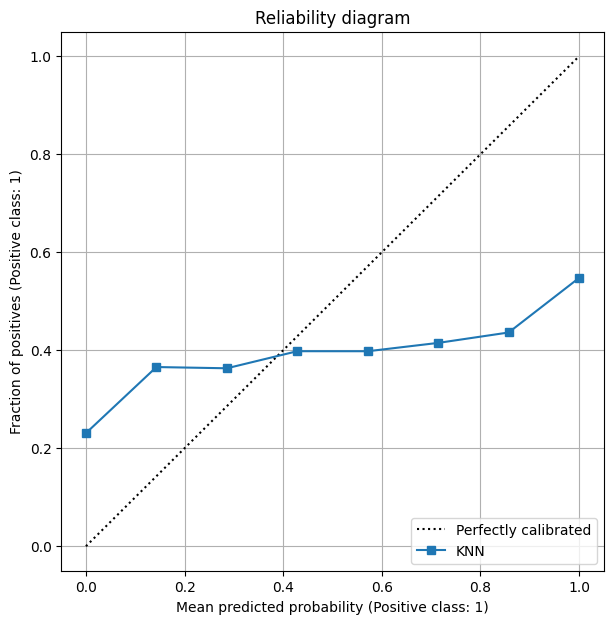

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)  

CalibrationDisplay.from_predictions(res['labels'], res['pred_probas'][:,1], n_bins=10, name='KNN', ax=ax)

plt.title('Reliability diagram')

In [217]:
# Load trades
file_path = os.path.expanduser('~/freqtrade/trades_knn.json')

with open(file_path, 'r') as json_file:
    data = json.load(json_file)

trades = data['strategy']['KNN']['trades']

entry_dates, entry_labels = [], []

for trade in trades:
    entry_labels.append(trade['profit_ratio'] > 0)
    entry_dates.append((pd.to_datetime(trade['open_date']).tz_localize(None)) - pd.Timedelta(hours=1))

entry_dates_set = set(entry_dates)
entry_labels = np.array(entry_labels)

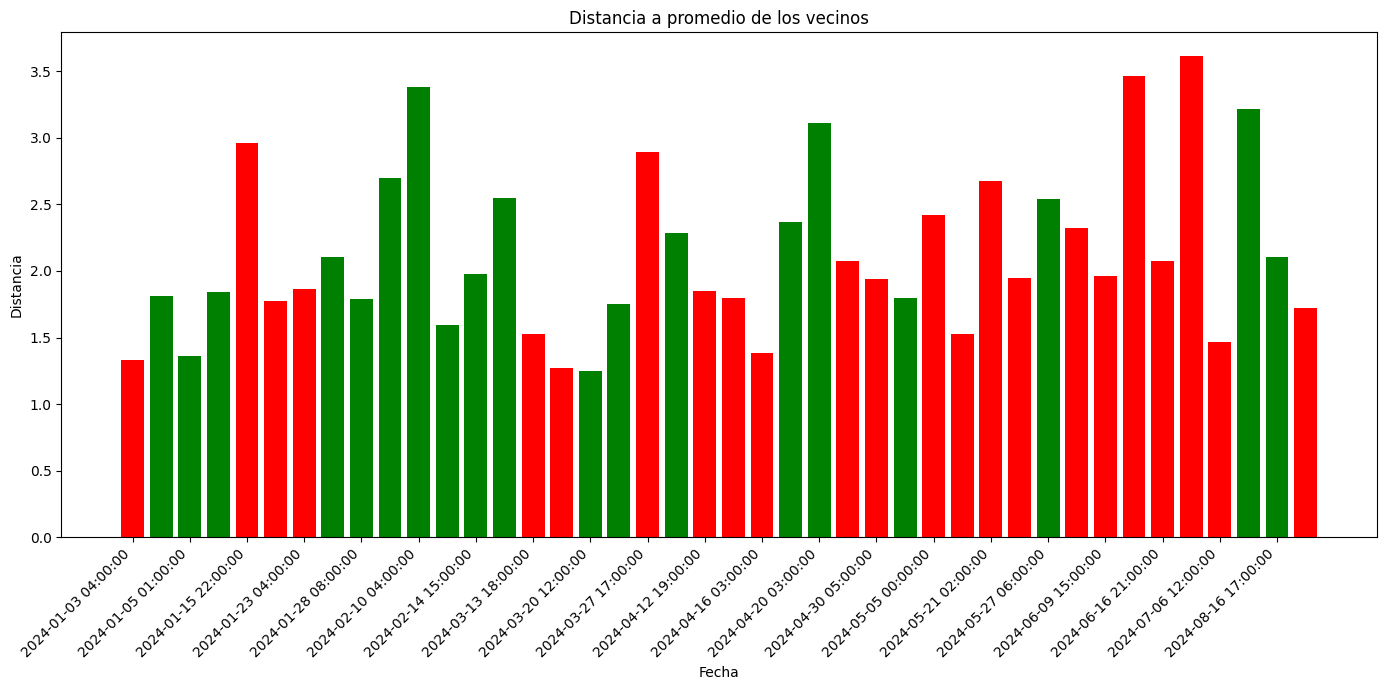

In [221]:
dist, dist_promedio, fechas = np.array(res['dist']), np.array(res['dist_media_promedio']), pd.Series(res['fecha'])
matches = fechas.isin(entry_dates_set)
entry_matches = pd.Series(entry_dates).isin(fechas)

# Filter out values
dist = dist[matches]
dist_promedio = dist_promedio[matches]
fechas = fechas[matches]
fechas_list = fechas.tolist()
entry_labels_filt = entry_labels[entry_matches]

x = np.arange(len(fechas))
colors = np.where(entry_labels_filt == 1, 'green', 'red')

plt.figure(figsize=(14, 7))
plt.bar(x, dist, color=colors)

space = 2
plt.xticks(x[::space], [fechas_list[i] for i in range(0, len(fechas_list), space)], rotation=45, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Distancia')
plt.title('Distancia a promedio de los vecinos')

plt.tight_layout()  
plt.show()

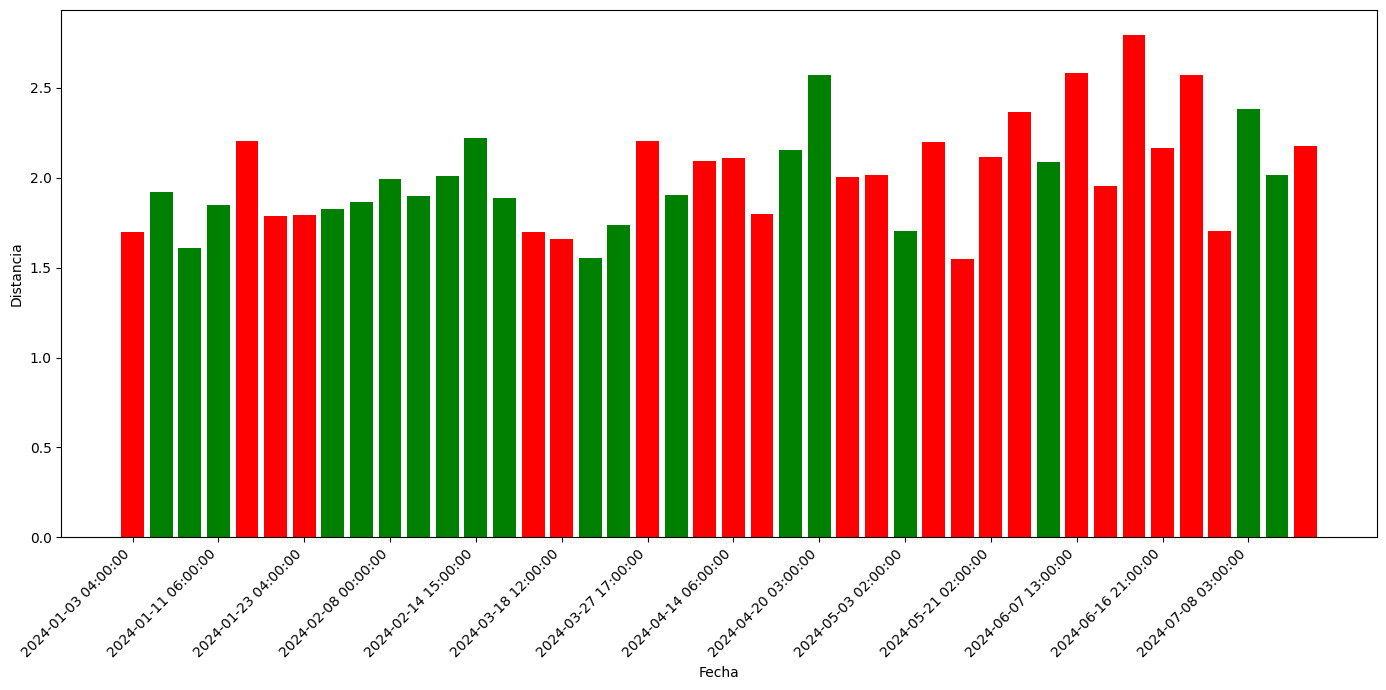

In [223]:
plt.figure(figsize=(14, 7))
plt.bar(x, dist_promedio, color=colors)

space = 3
plt.xticks(x[::space], [fechas_list[i] for i in range(0, len(fechas_list), space)], rotation=45, ha='right')
plt.xlabel('Fecha')
plt.ylabel('Distancia')

plt.tight_layout()  
plt.show()

In [88]:
#cm = ConfusionMatrixDisplay.from_predictions(labels, pred_probas[:,1] >= 6/7)

In [33]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import pandas as pd
import redis
from flask_caching import Cache
from threading import Timer
import webbrowser

def plot_labels(data_labeled, start_date):
    start_idx = (data_labeled.startDate == (date - pd.Timedelta(days=3))).idxmax()
    end_idx = (data_labeled.startDate == (date + pd.Timedelta(days=3))).idxmax()
    data_subset = data_labeled.iloc[start_idx:end_idx]

    # Prepare the data for Plotly
    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=data_subset.index,
        open=data_subset['open'],
        high=data_subset['high'],
        low=data_subset['low'],
        close=data_subset['close'],
        name='Candlestick'
    ))

    # Add green and red ticks
    buy_signals = data_subset[data_subset['label'] == 1]
    sell_signals = data_subset[data_subset['label'] == 0]

    fig.add_trace(go.Scatter(
        x=buy_signals.index,
        y=buy_signals['close'],
        mode='markers',
        marker=dict(color='green', symbol='triangle-up', size=10),
        name='Buy Signal'
    ))

    fig.add_trace(go.Scatter(
        x=sell_signals.index,
        y=sell_signals['close'],
        mode='markers',
        marker=dict(color='red', symbol='triangle-down', size=10),
        name='Sell Signal'
    ))

    fig.update_layout(
        title='Candlestick Chart with Buy and Sell Signals',
        xaxis_title='Date',
        yaxis_title='Price',
        autosize=False,  
        width=1600,
        height=800
    )

    # Initialize the Dash app
    app = dash.Dash(__name__)
    cache = Cache(app.server, config={
        'CACHE_TYPE': 'redis',
        'CACHE_REDIS_URL': 'redis://localhost:6379'
    })

    # Define the layout of the Dash app
    app.layout = html.Div([
        dcc.Graph(
            id='candlestick-chart',
            figure=fig
        )
    ])

    return app

In [50]:
date, neigh_dates = fp[0]
idx_start = (data_labeled_btc_cp.startDate == (date - pd.Timedelta(days=3))).idxmax()
data_labeled_btc_cp.loc[idx_start, :]

startDate        2024-03-29 16:00:00
open                        69179.99
high                        69591.43
low                         69078.62
close                       69176.47
volume                    1972.71473
label                              1
endDate          2024-03-31 15:00:00
profits                     0.017414
profit_curado                      1
Name: 54590, dtype: object

In [45]:
data_labeled_after2020 = data_labeled_btc_cp[data_labeled_btc_cp.startDate >= pd.to_datetime('2020-12-31 00:00:00')]

#app = plot_labels(data_labeled_after2020, 0, 100)
app = plot_labels(data_labeled_btc_cp, 0, 100)

Timer(1, lambda: webbrowser.open_new_tab('http://127.0.0.1:8050/')).start()
app.run_server(debug=False)

## Modelo

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, auc, precision_score, average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, ParameterGrid, cross_validate, RandomizedSearchCV
from skopt import BayesSearchCV
from joblib import Parallel, delayed, dump, load
from tqdm import tqdm
from xgboost import XGBClassifier
import xgboost as xgb
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from helper_functions import get_results_df

In [29]:
df_fin.sort_values(by='startDate', inplace=True)
df_fin['Partitor'] = np.select(
        [
            df_fin['startDate'] < pd.to_datetime("2023-01-01"),  # 'TRAIN'dates
            df_fin['startDate'] >= pd.to_datetime("2024-01-01")  # 'TEST' dates
        ],
        [
            'Train',
            'Test'
        ],
        default='Val'  # Default value if neither condition is met
    )

exclude_cols = ['coin', 'endDate', 'startDate', 'profits', 'profit_curado', 'Partitor']

df_dev = df_fin[df_fin.Partitor != 'Test']
df_test = df_fin[df_fin.Partitor == 'Test']

X_dev, y_dev = df_dev.drop(exclude_cols,axis=1), df_dev['profit_curado']
X_test, y_test = df_test.drop(exclude_cols,axis=1), df_test['profit_curado']

X_dev.shape, X_test.shape

((317007, 240), (34609, 240))

In [10]:
tscv = TimeSeriesSplit(n_splits=5, gap=500)

search_space = {'ccp_alpha': (1e-4,1e-1,'log-uniform'),
                'n_estimators':(50,350),
                'max_depth':(2,4),
                'min_samples_leaf': (25,100),
                }

rf = RandomForestClassifier(n_jobs=1, random_state=42)

opt_roc = BayesSearchCV(rf, search_space, n_iter=30, return_train_score=True, scoring='roc_auc',
                        cv=tscv, random_state=42, n_jobs=1, n_points=2, verbose=0)

In [11]:
start_time = time.time()

# Optimizando ROC-AUC
opt_roc.fit(X_dev, y_dev)
res_roc = get_results_df(opt_roc)

print(f"Total time: {(time.time()-start_time)/60:.2f}m")

Total time: 442.65m


In [12]:
res_roc.head()

,mean_test_score,mean_train_score,params,ccp_alpha,max_depth,min_samples_leaf,n_estimators
rank_test_score,,,,,,,
1,0.529138,0.573163,"{'ccp_alpha': 0.0001, 'max_depth': 4, 'min_sam...",0.0001,4,25,318
2,0.529070,0.571263,"{'ccp_alpha': 0.00013598759245987815, 'max_dep...",0.000136,4,99,341
3,0.528842,0.564367,"{'ccp_alpha': 0.0003057717712009788, 'max_dept...",0.000306,4,25,350
4,0.528586,0.561426,"{'ccp_alpha': 0.0004076917144714473, 'max_dept...",0.000408,4,100,350
5,0.528179,0.571234,"{'ccp_alpha': 0.00011039630121375861, 'max_dep...",0.00011,4,100,50


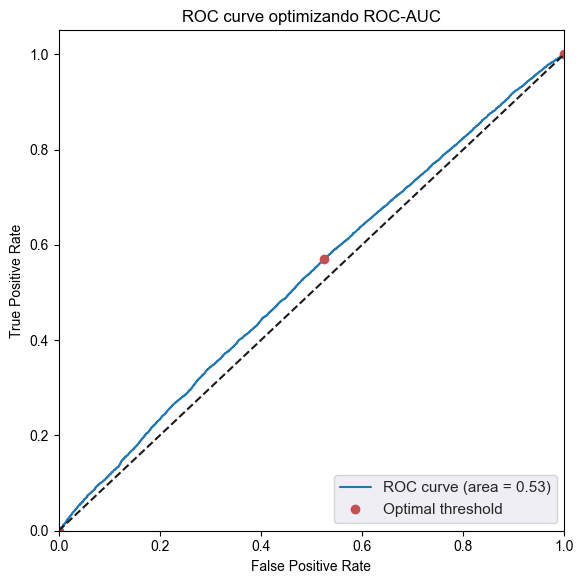

In [30]:
params = {'ccp_alpha': 0.0001, 'max_depth': 4, 'min_samples_leaf': 25, 'n_estimators': 300}
clf_roc = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
clf_roc.fit(X_dev, y_dev)
y_probas_roc = clf_roc.predict_proba(X_test)[:,1]

fpr_roc, tpr_roc, thresholds_roc = roc_curve(y_test, y_probas_roc)
optimal_threshold_roc = thresholds_roc[np.argmax(tpr_roc-fpr_roc)]
fpr_optimal_roc, tpr_optimal_roc, _ = roc_curve(y_test, y_probas_roc > optimal_threshold_roc)
roc_auc_roc = roc_auc_score(y_test, y_probas_roc)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
sns.set_theme()

# Plot ROC curve for clf_roc
axs.plot(fpr_roc, tpr_roc, label='ROC curve (area = %0.2f)' % roc_auc_roc)
axs.plot(fpr_optimal_roc, tpr_optimal_roc, 'ro', label='Optimal threshold')  
axs.plot([0, 1], [0, 1], 'k--')
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC curve optimizando ROC-AUC')
axs.legend(loc="lower right")

# Display the figure
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Reliability diagram')

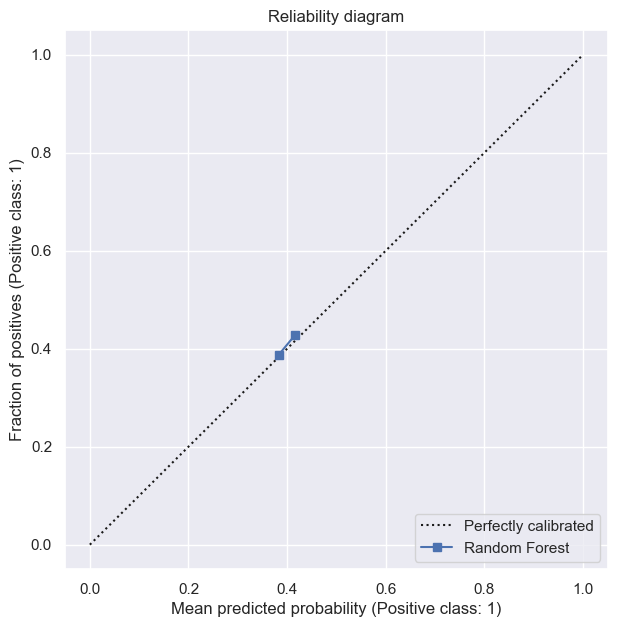

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid(True)  

CalibrationDisplay.from_predictions(y_test, y_probas_roc, n_bins=10, name='Random Forest', ax=ax)

plt.title('Reliability diagram')

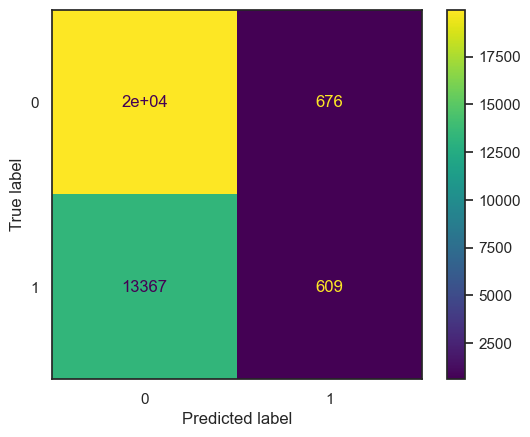

In [20]:
y_pred = y_probas_roc > 0.43

sns.set_style("white")
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Markov

In [5]:
import pickle
import os
import numpy as np
import pandas as pd

os.chdir('/home/matias/Downloads/juli/')

with open('codificacion_markov.pkl', 'rb') as file:
    markov = pickle.load(file)
    
with open('fechas.pkl', 'rb') as file:
    fechas = pickle.load(file)
    
with open('profits.pkl', 'rb') as file:
    profits = pickle.load(file)

In [23]:
fechas_desde = []
fechas_hasta = []
markov_probas = []

for group in fechas:
    fecha = group[0]
    desde, hasta = fecha.split('\nto\n')
    cleaned_desde= desde.replace(' hs)', '').replace('(', '')
    cleaned_hasta= hasta.replace(' hs)', '').replace('(', '')
    datetime_desde = pd.to_datetime(cleaned_desde, format='%Y/%m/%d %H')
    datetime_hasta = pd.to_datetime(cleaned_hasta, format='%Y/%m/%d %H')
    fechas_desde.append(datetime_desde)
    fechas_hasta.append(datetime_hasta)
       

for group in markov:
    arr_group = np.array([arr.flatten() for arr in group])
    markov_probas.append(arr_group.flatten())

In [25]:
markov_df = pd.DataFrame(markov_probas)
markov_df['Profit'] = profits
markov_df['Fecha desde'] = fechas_desde
markov_df['Fecha hasta'] = fechas_hasta

markov_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,Profit,Fecha desde,Fecha hasta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0587,2020-12-31 00:00:00,2020-12-31 19:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0599,2020-12-31 01:00:00,2020-12-31 20:00:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0603,2020-12-31 02:00:00,2020-12-31 21:00:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0633,2020-12-31 03:00:00,2020-12-31 22:00:00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0667,2020-12-31 04:00:00,2020-12-31 23:00:00
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0593,2020-12-31 05:00:00,2021-01-01 00:00:00
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0585,2020-12-31 06:00:00,2021-01-01 01:00:00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0553,2020-12-31 07:00:00,2021-01-01 02:00:00
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0582,2020-12-31 08:00:00,2021-01-01 03:00:00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0499,2020-12-31 09:00:00,2021-01-01 04:00:00


In [27]:
markov_df.to_csv('probas_markov_joint.csv', index=False)

In [1]:
import os
import pandas as pd
import ta
import numpy as np
import requests
from pandas import DataFrame
from pandas.tseries.offsets import DateOffset
from threading import Timer
import webbrowser
from pathlib import Path

# Change direct,ory
# Modify this cell to insure that the output shows the correct path.
# Define all paths relative to the project root shown in the cell output
project_root = "/home/matias/freqtrade"
i=0
try:
    os.chdirdir(project_root)
    assert Path('LICENSE').is_file()
except:
    while i<4 and (not Path('LICENSE').is_file()):
        os.chdir(Path(Path.cwd(), '../'))
        i+=1
    project_root = Path.cwd()
print(Path.cwd())

/home/matias/freqtrade


In [18]:
def process_dataframe(df, indicators=True, lags=14):
    if indicators: add_indicators(df)
    numeric = df.select_dtypes('number')
    dfs_to_concat = list()
  
    for i in range(1,lags+1):     
        df_shifted = numeric.shift(lags-i+1)
        df_shifted.columns = [f"{col}_{i}" for col in list(numeric.columns)]
        dfs_to_concat.append(df_shifted)

    res = pd.concat(dfs_to_concat, axis=1)
    res['startDate'] = pd.to_datetime(df['date']).dt.tz_convert(None)
    res = res.dropna().reset_index(drop=True)
    return res

In [11]:
dir = '/home/matias/Downloads/freqtrade/results/'
cols = ['startDate','endDate','open_rate','close_rate','profit','exit_reason']
df_all = []

for file in os.listdir(dir):
    df = pd.read_csv(dir+file, header=None)
    df.columns = cols
    crypto = str.split(file, "_")[0]
    df['crypto'] = crypto
    df_all.append(df)

df_all = pd.concat(df_all, axis=0).reset_index(drop=True)
df_all['startDate'] = pd.to_datetime(df_all['startDate'], format='%Y%m%d%H')
df_all['endDate'] = pd.to_datetime(df_all['endDate'], format='%Y%m%d%H')
df_all['profit'] = df_all['profit']/100

print(np.unique(df_all['exit_reason']))
print(df_all.isnull().values.any())

df_all = df_all.drop(columns=['open_rate', 'close_rate', 'exit_reason'])
df_all.head()

['trailing_stop_loss']
False


,startDate,endDate,profit,crypto
0,2020-12-31 02:00:00,2020-12-31 13:00:00,-0.0430,SOL
1,2020-12-31 03:00:00,2020-12-31 13:00:00,-0.0555,SOL
2,2020-12-31 04:00:00,2021-01-03 14:00:00,0.3489,SOL
3,2020-12-31 05:00:00,2021-01-03 14:00:00,0.3394,SOL
4,2020-12-31 06:00:00,2021-01-03 14:00:00,0.3461,SOL


In [12]:
# Veo si hay huecos espaciales
for crypto in np.unique(df_all.crypto):
    df_crypto = df_all[df_all.crypto==crypto].copy()
    df_crypto['time_diff'] = df_crypto['startDate'].diff()/pd.Timedelta(hours=1)
    print(crypto, np.unique(df_crypto.iloc[1:,:].time_diff, return_counts=True))

df_crypto = df_all[df_all.crypto=='SOL'].copy()
df_crypto['time_diff'] = df_crypto['startDate'].diff()/pd.Timedelta(hours=1)
df_crypto[df_crypto.time_diff != 1]

ADA (array([1., 2., 3., 4., 5.]), array([30617,     3,     2,     1,     1]))
BNB (array([1., 2., 3., 4., 5.]), array([26280,     4,     2,     1,     1]))
BTC (array([1., 2., 3., 4., 5.]), array([26258,     3,     2,     1,     1]))
DOGE (array([1., 2., 3., 4., 5.]), array([26285,     3,     2,     1,     1]))
ETH (array([1., 2., 3., 4., 5.]), array([26282,     3,     2,     1,     1]))
MATIC (array([1., 2., 3., 4., 5.]), array([26282,     3,     2,     1,     1]))
SOL (array([1., 2., 3., 4., 5.]), array([26270,     8,     2,     1,     1]))


,startDate,endDate,profit,crypto,time_diff
0,2020-12-31 02:00:00,2020-12-31 13:00:00,-0.0430,SOL,NaN
682,2021-01-28 13:00:00,2021-01-29 05:00:00,-0.0333,SOL,2.0
1010,2021-02-11 06:00:00,2021-02-12 14:00:00,0.0008,SOL,2.0
1559,2021-03-06 04:00:00,2021-03-08 08:00:00,0.0679,SOL,2.0
2638,2021-04-20 05:00:00,2021-04-22 00:00:00,0.0050,SOL,3.0
2759,2021-04-25 09:00:00,2021-04-27 14:00:00,0.0006,SOL,4.0
3539,2021-05-27 22:00:00,2021-05-29 11:00:00,-0.2106,SOL,2.0
5392,2021-08-13 07:00:00,2021-08-17 20:00:00,0.4605,SOL,5.0
6521,2021-09-29 10:00:00,2021-10-03 21:00:00,0.2202,SOL,3.0
9111,2022-01-15 09:00:00,2022-01-16 21:00:00,0.0045,SOL,2.0


In [18]:
df_final = []
for crypto in np.unique(df_all['crypto']):
    df_crypto_1h = pd.read_feather(f"~/freqtrade/user_data/data/binance/{crypto}_USDT-1h.feather")
    
    # Add pct_change
    numeric_cols = df_crypto_1h.select_dtypes(include='number').columns
    df_crypto_1h[numeric_cols] = df_crypto_1h[numeric_cols].pct_change()
    
    # Process to 14 windows format
    df_crypto_prices = process_dataframe(df_crypto_1h, indicators=False) 
    
    # Merge dataframe for each crypto by startDate
    df_crypto_profits = df_all[df_all['crypto'] == crypto]    
    merged_df = pd.merge(df_crypto_prices, df_crypto_profits, how='inner', on='startDate')
    df_final.append(merged_df)

df_final = pd.concat(df_final, axis=0).reset_index(drop=True)
df_final.to_csv('~/Downloads/crypto_1h.csv', index=False)

## Indicadores tecnicos

In [42]:
def process_dataframe(df, indicators=True, lags=14):
    if indicators: add_technical_indicators(df)
    numeric = df.select_dtypes('number')
    dfs_to_concat = list()
  
    for i in range(1, lags + 1):     
        df_shifted = numeric.shift(lags - i + 1)
        df_shifted.columns = [f"{col}_{i}" for col in list(numeric.columns)]
        dfs_to_concat.append(df_shifted)

    res = pd.concat(dfs_to_concat, axis=1)
    res['startDate'] = pd.to_datetime(df['date']).dt.tz_convert(None)
    res = res.dropna().reset_index(drop=True)
    return res

def add_technical_indicators(df):
    df['rsi'] = ta.momentum.rsi(df.close)/100
    df['stoch'] = ta.momentum.stoch(df.high, df.low, df.close)/100
    df['adx'] = ta.trend.adx(df.high, df.low, df.close)/100
    df['macd'] = ta.trend.macd(df.close)/ta.trend.ema_indicator(df.close, window=26)  # macd = (ema12 - ema26)/ema26
    df['adi'] = ta.volume.acc_dist_index(df.high, df.low, df.close, df.volume)  # adi = adi_prev + volume*CLV
    
    pct_change_cols = ['adi']
    # pct_change_cols = ['open','high','low','close','volume','adi']
    pct_change_df = df[pct_change_cols].pct_change()
    df.update(pct_change_df)
    df.drop(columns=['open', 'high', 'low', 'close', 'volume'], inplace=True)
    
    return df

In [44]:
def merge_dataframes(df_full, df_crypto, crypto):
    df_full_filt = df_full[df_full.coin==crypto].reset_index()
    start = max(min(df_full_filt.startDate), min(df_crypto.startDate))
    end = max(df_full_filt.startDate)
    df_crypto = df_crypto[(df_crypto.startDate >= start) & (df_crypto.startDate <= end)].reset_index()
    df_full_filt = df_full_filt[df_full_filt.startDate >= start].reset_index()

    df_crypto['endDate'] = df_full_filt.endDate
    df_crypto['coin'] = crypto
    df_crypto['profits'] = df_full_filt.profits
    df_crypto['Partitor'] = df_full_filt.Partitor
    return df_crypto.drop(columns='index')

def make_dataframe(df):
    df_full = []
    for pair in pairs:
        crypto = pair.split("_")[0]
        df_coin = pd.read_feather(f"~/freqtrade/user_data/data/binance/{pair}-1d.feather")
        df_coin_processed = process_dataframe(df_coin, indicators=True)
        df_merged = merge_dataframes(df, df_coin_processed, crypto)
        df_full.append(df_merged)
    
    return pd.concat(df_full, axis=0).reset_index(drop=True)

In [45]:
df = pd.read_csv('./dev/crypto_trading/modelos/datos/CryptoFinal.csv')
df.startDate = pd.to_datetime(df.startDate)
df.endDate = pd.to_datetime(df.endDate)

df_final = make_dataframe(df)

In [47]:
df_final.to_csv('./dev/crypto_trading/modelos/datos/CryptoFinal_indicators.csv', index=False)

## Create dataset

In [9]:
df_btc = pd.read_feather("~/freqtrade/user_data/data/binance/BTC_USDT-1d.feather")
df = pd.read_csv('./dev/crypto_trading/modelos/datos/CryptoFinal.csv')
df.startDate = pd.to_datetime(df.startDate)
df.endDate = pd.to_datetime(df.endDate)

def process_dataframe(dataframe, lags=14):
    dataframe.date = pd.to_datetime(dataframe.date).dt.tz_localize(None)
    cols = ['open', 'high', 'low', 'close', 'volume']
    candles = dataframe.loc[:, cols]  
    dfClean = candles.pct_change().dropna() # Calcula variación porcentual 
    dfs_to_concat = list()
  
    for i in range(lags,0,-1):
        df_shifted = dfClean.shift(i)
        df_shifted.columns = [f"{col}_{lags-i+1}" for col in list(dfClean.columns)]
        dfs_to_concat.append(df_shifted)

    # Lo une en un solo DataFrame  
    result_df = pd.concat(dfs_to_concat, axis=1).dropna() 
    result_df['startDate'] = dataframe['date'].iloc[lags:]
    return result_df

btc_proc = process_dataframe(df_btc, lags=28)

def merge_dataframes(df_full, df_crypto, crypto):
    df_full_filt = df_full[df_full.coin==crypto].reset_index()
    start = max(min(df_full_filt.startDate), min(df_crypto.startDate))
    end = max(df_full_filt.startDate)
    df_crypto = df_crypto[(df_crypto.startDate >= start) & (df_crypto.startDate <= end)].reset_index()
    df_full_filt = df_full_filt[df_full_filt.startDate >= start].reset_index()

    df_crypto['endDate'] = df_full_filt.endDate
    df_crypto['coin'] = crypto
    df_crypto['profits'] = df_full_filt.profits
    df_crypto['Partitor'] = df_full_filt.Partitor
    return df_crypto.drop(columns='index')

np.unique(df.coin)
merged = merge_dataframes(df, btc_proc, 'BTC')

In [3]:
pairs = ["ETH_USDT","BNB_USDT","ADA_USDT","DOGE_USDT","MATIC_USDT","SOL_USDT","BTC_USDT", "TRX_USDT", "XRP_USDT", "LTC_USDT"]
def make_dataframe(df, n_days):
    df_full = []
    for pair in pairs:
        crypto = pair.split("_")[0]
        df_coin = pd.read_feather(f"~/freqtrade/user_data/data/binance/{pair}-1d.feather")
        df_coin_processed = process_dataframe(df_coin, lags=n_days)
        df_merged = merge_dataframes(df, df_coin_processed, crypto)
        df_full.append(df_merged)
    return pd.concat(df_full, axis=0).reset_index(drop=True)

df_final = make_dataframe(df, 28)
len(df_final) == len(df)
#df_final.to_csv('./dev/crypto_trading/modelos/datos/CryptoFinal_v2.csv', index=False)

False

In [94]:
crypto = 'BTC'
df = pd.read_csv('./dev/crypto_trading/modelos/datos/CryptoFinal_v2.csv')
df_crypto = pd.read_feather(f"~/freqtrade/user_data/data/binance/{crypto}_USDT-1d.feather")
df_crypto.set_index('date', inplace=True)

df_full = df[df.coin==crypto]
df_full.head()

,open_1,high_1,low_1,close_1,volume_1,open_2,high_2,low_2,close_2,volume_2,...,open_28,high_28,low_28,close_28,volume_28,startDate,endDate,coin,profits,Partitor
10506,0.111020,-0.016481,0.049384,-0.024523,-0.268424,-0.024315,0.119762,0.010982,0.096794,1.331973,...,0.037062,0.050987,0.052137,0.033848,-0.104631,2018-01-29,2018-02-24,BTC,-0.2044,TRAIN
10507,-0.024315,0.119762,0.010982,0.096794,1.331973,0.097730,-0.010724,0.097748,0.016654,-0.207810,...,0.033041,-0.021968,-0.023532,-0.052942,-0.160888,2018-01-30,2018-02-24,BTC,-0.1599,TRAIN
10508,0.097730,-0.010724,0.097748,0.016654,-0.207810,0.015624,-0.001800,-0.016393,0.009386,0.341009,...,-0.053017,-0.055666,-0.111275,-0.090080,0.803366,2018-01-31,2018-02-24,BTC,-0.0761,TRAIN
10509,0.015624,-0.001800,-0.016393,0.009386,0.341009,0.009387,0.124099,0.048998,0.126222,0.090102,...,-0.090676,-0.078045,-0.020202,0.004649,-0.294995,2018-02-01,2018-02-24,BTC,-0.0810,TRAIN
10510,0.009387,0.124099,0.048998,0.126222,0.090102,0.126221,-0.001928,0.096658,0.006450,-0.201279,...,0.005386,-0.008714,-0.097836,-0.103118,0.863058,2018-02-02,2018-02-24,BTC,0.0246,TRAIN


In [87]:
cambios_pct = df_crypto.pct_change()
#df_crypto.iloc[33:,:].head()
cambios_pct.iloc[33:,:].head()

,open,high,low,close,volume
date,,,,,
2018-02-02 00:00:00+00:00,-0.159046,-0.061223,-0.154114,0.024659,0.854922
2018-02-03 00:00:00+00:00,0.024669,-0.036748,0.175589,-0.002380,-0.416179
2018-02-04 00:00:00+00:00,0.000123,-0.058074,-0.066396,-0.141293,-0.141871
2018-02-05 00:00:00+00:00,-0.138404,-0.118142,-0.241126,-0.193939,0.551734
2018-02-06 00:00:00+00:00,-0.199838,-0.000058,-0.091577,0.227512,0.969084


## Stoploss

In [ ]:
# Assuming df is your DataFrame
df = pd.read_feather("/home/matias/freqtrade/user_data/data/binance/BTC_USDT-1d.feather")
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(None)

def calculate_stoploss(dataframe):
    tr1 = dataframe['high'].iloc[:-1] - dataframe['low'].iloc[:-1] 
    tr2 = abs(dataframe['high'].iloc[:-1] - dataframe['close'].iloc[:-1].shift())
    tr3 = abs(dataframe['low'].iloc[:-1] - dataframe['close'].iloc[:-1].shift())
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(9).mean() 

    # Check if there are at least 9 data points
    if len(atr) < 9 or pd.isna(atr.iloc[-1]):
        return None

    stop_loss = dataframe["close"].iloc[-1] - (atr.iloc[-1] * 1) 
    current_rate = dataframe["close"].iloc[-1]
    loss_percent = (current_rate - stop_loss) / current_rate
    return loss_percent

# Pre-calculate stoploss for all rows
#df['stoploss'] = [calculate_stoploss(df.iloc[:i+1]) for i in range(len(df))]

def apply_stoploss(df, idx, stoploss):
    if stoploss[idx] is None:
        return
    buy_price = df['close'].iloc[idx]
    max_price = buy_price
    for i in range(idx+1, len(df)):
        max_price = max(max_price, df['close'].iloc[i])
        stoploss_price = max_price * (1 - stoploss[i])
        if stoploss[i] is not None and df['low'].iloc[i] <= stoploss_price:
            sell_price = df.iat[i,3]
            df.iat[idx,-1] = df.iat[i,0]
            df.iat[idx,-2] = (sell_price-buy_price)/buy_price
            break

In [12]:
data = pd.read_csv('dev/crypto_trading/modelos/datos/Data_IntercambioBTC_3.csv')
start_date, end_date = pd.to_datetime(data.startDate), pd.to_datetime(data.endDate)
(end_date-start_date).quantile(np.arange(0, 1.1, 0.1))

0.0     1 days
0.1    13 days
0.2    16 days
0.3    18 days
0.4    21 days
0.5    25 days
0.6    29 days
0.7    34 days
0.8    40 days
0.9    51 days
1.0   158 days
dtype: timedelta64[ns]

## APIs

### FNG

In [4]:
FEAR_ADN_GREED_API = 'https://api.alternative.me/fng/?limit=0'
df = pd.read_csv('./dev/crypto_trading/modelos/datos/Data_IntercambioBTC.csv')
df['startDate'] = pd.to_datetime(df['startDate']).dt.tz_localize(None)
df['endDate'] = pd.to_datetime(df['endDate']).dt.tz_localize(None)

# call the Fear and Greed API 
def create_fng_dataset(url=FEAR_ADN_GREED_API) -> pd.DataFrame:
    """
    Function to create the Fear and Greed Dataset
    """
    response = requests.get(url)
    df = pd.DataFrame(response.json()['data'])
    df['value'] = df['value'].astype(int) /100 
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('date')
    df['FnG'] = df['value']
    df = df.drop(columns=['value','time_until_update','timestamp','value_classification'])
    df = df[::-1]
    return df

df_fng= create_fng_dataset().pct_change()
for i in range(14, 0, -1):
    df_fng[f'FnG_{14-i+1}'] = df_fng['FnG'].shift(i)
    #df[f'FnG_{i}'] = np.nan

df_fng.drop(columns = 'FnG', inplace=True)
df = df.merge(df_fng, left_on='startDate', right_index=True, how='left')

# Rearrange cols
pattern = ['open_', 'high_', 'low_', 'close_', 'volume_', 'FnG_']
new_columns = [f'{p}{i}' for i in range(1, 15) for p in pattern]
rest_columns = [col for col in df.columns if col not in new_columns]
new_columns += rest_columns
df = df[new_columns]
#df.to_csv('./dev/crypto_trading/modelos/datos/Data_IntercambioBTC_fng.csv', index=False)

/tmp/ipykernel_44154/1054389852.py:20: FutureWarning:

The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.



In [5]:
df

,open_1,high_1,low_1,close_1,volume_1,FnG_1,open_2,high_2,low_2,close_2,...,high_14,low_14,close_14,volume_14,FnG_14,startDate,endDate,Crypto,profits,Partitor
0,0.015134,-0.041949,0.031712,-0.042591,0.577606,NaN,-0.056741,0.041580,-0.079564,0.063454,...,0.065591,-0.017591,-0.061619,0.889167,NaN,2018-01-17,2018-02-01,BNB,-0.1810,TRAIN
1,-0.056741,0.041580,-0.079564,0.063454,0.038773,NaN,0.056415,-0.014971,0.061138,-0.058421,...,-0.132024,-0.277686,-0.146013,0.638110,NaN,2018-01-18,2018-02-01,BNB,-0.2311,TRAIN
2,0.056415,-0.014971,0.061138,-0.058421,0.459036,NaN,-0.044695,0.558090,-0.018816,0.448962,...,-0.061908,0.003285,0.049996,-0.251381,NaN,2018-01-19,2018-02-01,BNB,-0.2251,TRAIN
3,-0.044695,0.558090,-0.018816,0.448962,1.150278,NaN,0.440983,0.405615,0.477836,0.517255,...,-0.009274,0.202518,-0.019650,-0.315660,NaN,2018-01-20,2018-02-01,BNB,-0.2391,TRAIN
4,0.440983,0.405615,0.477836,0.517255,0.865334,NaN,0.525627,-0.024123,0.282626,-0.128069,...,-0.010979,0.013973,0.034288,-0.317312,NaN,2018-01-21,2018-02-01,BNB,-0.2175,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11497,-0.015098,-0.008248,-0.007646,-0.001011,0.253983,0.066667,-0.001053,-0.004207,-0.016876,0.003712,...,0.023129,0.002797,0.020202,0.106314,0.041667,2024-02-20,2024-02-27,SOL,-0.0655,TEST
11498,-0.001053,-0.004207,-0.016876,0.003712,0.039546,-0.031250,0.003556,0.011941,0.009570,0.013499,...,0.003863,0.022746,0.000446,0.252146,-0.040000,2024-02-21,2024-02-27,SOL,-0.0287,TEST
11499,0.003556,0.011941,0.009570,0.013499,0.019771,0.064516,0.013461,0.007154,0.024322,-0.004207,...,-0.031889,-0.038641,-0.036550,0.399399,0.083333,2024-02-22,2024-02-27,SOL,-0.0063,TEST
11500,0.013461,0.007154,0.024322,-0.004207,0.320039,0.090909,-0.003918,-0.015671,0.001266,-0.000373,...,-0.021339,-0.040417,-0.022410,-0.154354,-0.051282,2024-02-23,2024-02-27,SOL,0.0149,TEST


### Yahoo finance

In [40]:
from yahooquery import Screener, Ticker

s = Screener()
#data = s.get_screeners('all_cryptocurrencies_us', count=10)
symbols = ["SPY", "QQQ"]
tickers = Ticker(symbols, asynchronous=True)
cols = ['open', 'high', 'low', 'close', 'volume']
data = tickers.history(start="2017-12-29", end="2023-11-29").loc[:,cols]
data.reset_index(level='symbol', inplace=True)
data.index = pd.to_datetime(data.index)

In [42]:
def process_dataframe(dataframe, lags=14):
    dfClean = dataframe.pct_change().dropna() # Calcula variación porcentual 
    dfs_to_concat = list()
  
    for i in range(lags,0,-1):
        df_shifted = dfClean.shift(i)
        df_shifted.columns = [f"{col}_{lags-i+1}" for col in list(dfClean.columns)]
        dfs_to_concat.append(df_shifted)

    # Lo une en un solo DataFrame  
    result_df = pd.concat(dfs_to_concat, axis=1).dropna()  
    return result_df

def fill_missing_days(df):
    df = df.resample('D').asfreq() # agrega dias faltantes
    df.ffill(inplace=True) # imputa valores faltantes por valor en dia previo
    return df

In [45]:
lags = 28
SPY, QQQ = data.loc[data.symbol=='SPY', :].drop(columns='symbol'), data.loc[data.symbol=='QQQ',:].drop(columns='symbol')
SPY, QQQ = fill_missing_days(SPY), fill_missing_days(QQQ)
spy_lags = process_dataframe(SPY, lags=lags)
qqq_lags = process_dataframe(QQQ, lags=lags)

spy_lags.head()

,open_1,high_1,low_1,close_1,volume_1,open_2,high_2,low_2,close_2,volume_2,...,open_27,high_27,low_27,close_27,volume_27,open_28,high_28,low_28,close_28,volume_28
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000493,-0.001510,0.001987,0.000424,-0.372573,0.000317,0.008302,0.005524,0.011578,0.273750
2018-01-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000317,0.008302,0.005524,0.011578,0.273750,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002570,0.000968,0.002850,0.007157,-0.097406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-30,-0.002570,0.000968,0.002850,0.007157,-0.097406,0.004182,0.006808,0.005834,0.006325,0.039405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005910,-0.000698,0.001902,-0.006630,-0.163582
2018-01-31,0.004182,0.006808,0.005834,0.006325,0.039405,0.008328,0.005616,0.005875,0.004215,-0.104740,...,0.005910,-0.000698,0.001902,-0.006630,-0.163582,-0.011646,-0.005900,-0.011529,-0.010257,0.462482


In [46]:
df_crypto = pd.read_csv('./dev/crypto_trading/modelos/datos/CryptoFinal_v2.csv', parse_dates=['startDate', 'endDate'])
df_crypto.dropna(inplace=True)
common_cols = np.array(df_crypto.columns.intersection(spy_lags.columns))
remaining_cols = np.array(df_crypto.columns.difference(spy_lags.columns))

# Arreglo orden de columnas despues de merge
colnames = np.concatenate([common_cols + '_crypto', common_cols + '_spy', common_cols + '_qqq', remaining_cols]) 

res_df = df_crypto.merge(spy_lags, left_on='startDate', right_index=True, how='inner', suffixes=['_crypto', '_spy']) 
qqq_lags_suffixed = qqq_lags.add_suffix('_qqq') # agrego sufijo _qqq a nombre de las columnas para distinguirlas
res_df = res_df.merge(qqq_lags_suffixed, left_on='startDate', right_index=True, how='inner') 

res_df = res_df[colnames]
res_df.head()

,open_1_crypto,high_1_crypto,low_1_crypto,close_1_crypto,volume_1_crypto,open_2_crypto,high_2_crypto,low_2_crypto,close_2_crypto,volume_2_crypto,...,open_28_qqq,high_28_qqq,low_28_qqq,close_28_qqq,volume_28_qqq,Partitor,coin,endDate,profits,startDate
0,0.077940,0.031824,0.065303,0.028625,-0.139218,0.029986,0.178050,0.045006,0.132836,1.100897,...,0.000000,0.000000,0.000000,0.000000,0.000000,TRAIN,ETH,2018-02-21,-0.3400,2018-01-29
2100,0.127931,-0.011139,0.037579,-0.009379,-0.492451,-0.011442,0.047506,0.037462,0.031361,0.929632,...,0.000000,0.000000,0.000000,0.000000,0.000000,TRAIN,BNB,2018-02-21,-0.3262,2018-01-29
10506,0.111020,-0.016481,0.049384,-0.024523,-0.268424,-0.024315,0.119762,0.010982,0.096794,1.331973,...,0.000000,0.000000,0.000000,0.000000,0.000000,TRAIN,BTC,2018-02-24,-0.2044,2018-01-29
1,0.029986,0.178050,0.045006,0.132836,1.100897,0.132638,0.056153,0.081355,0.092075,-0.213816,...,0.007561,-0.000234,0.004616,-0.004856,0.163542,TRAIN,ETH,2018-02-21,-0.2980,2018-01-30
2101,-0.011442,0.047506,0.037462,0.031361,0.929632,0.031373,0.039108,0.021391,0.067585,-0.249669,...,0.007561,-0.000234,0.004616,-0.004856,0.163542,TRAIN,BNB,2018-02-21,-0.2766,2018-01-30


In [49]:
res_df = res_df.sort_index()

In [50]:
print(len(df_crypto) == len(res_df))
res_df.to_csv('./dev/crypto_trading/modelos/datos/Crypto_extended_28.csv', index=False)

True
